In [17]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Dense,Flatten,Dropout,Activation, MaxPooling2D
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support

In [18]:
x_data=[]

path='signatures/full_forg/'
for file in os.listdir(path):
    img=cv2.imread(f'{path}{file}',cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, (220,155))
    x_data.append(resized_image)

path='signatures/full_org/'
for file in os.listdir(path):
    img=cv2.imread(f'{path}{file}',cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, (220,155))
    x_data.append(resized_image)

y_data=[0 for i in range(1320)]+[1 for i in range(1320)]

In [19]:
x_data=np.array(x_data)
y_data=np.array(y_data)
x_data.shape,y_data

((2640, 155, 220), array([0, 0, 0, ..., 1, 1, 1]))

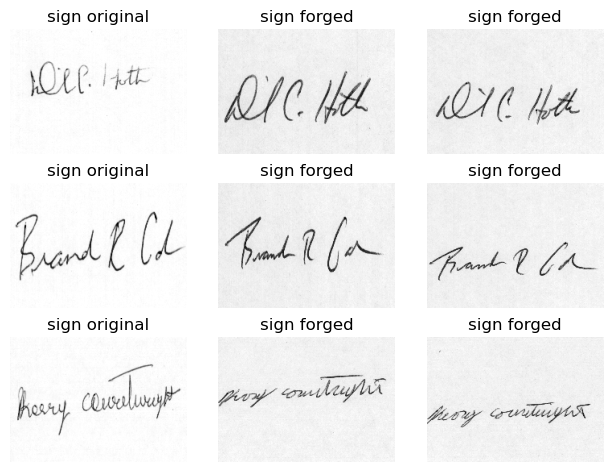

In [31]:
def Show_example_digits(mono = 'gray'):
    for idx in range(3):
        r=random.randint(0,55)
        plt.subplot(3, 3,idx*3+1)
        plt.imshow(x_data[r*24], cmap = mono)
        plt.title("sign original")
        plt.axis('off')
        for i in range(2):
            plt.subplot(3, 3,idx*3+2+i)
            plt.imshow(x_data[1320+r*24+i], cmap = mono)
            plt.title("sign forged" )
            plt.axis('off')
    plt.tight_layout()

Show_example_digits()

In [5]:
x_data=x_data/255

In [6]:
shuffle_index=np.random.permutation(1640)
x_data,y_data=x_data[shuffle_index],y_data[shuffle_index]

In [7]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [8]:
x_train.shape,x_test.shape

((1312, 155, 220), (328, 155, 220))

In [9]:
x_train=np.asarray(x_train).astype(np.float32)


# y_train=np.asarray(y_train).astype(np.int)
tensorflow.convert_to_tensor(x_train, dtype=tensorflow.uint8)


<tf.Tensor: shape=(1312, 155, 220), dtype=uint8, numpy=
array([[[0, 1, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 1, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]],

       [[1, 0, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 1, 0, 0],
        [1, 0

In [92]:
model = Sequential()

model.add(Flatten(input_shape=(155,220)))  #34,100
model.add(Dense(1000,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [93]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 34100)             0         
                                                                 
 dense_6 (Dense)             (None, 1000)              34101000  
                                                                 
 dense_7 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 34103002 (130.09 MB)
Trainable params: 34103002 (130.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [95]:
history = model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
33/33 [==============================] - 16s 460ms/step - loss: 12.8380 - accuracy: 0.6902 - val_loss: 0.9390 - val_accuracy: 0.1711
Epoch 2/20
33/33 [==============================] - 14s 431ms/step - loss: 2.9569 - accuracy: 0.7054 - val_loss: 2.7659 - val_accuracy: 0.8289
Epoch 3/20
33/33 [==============================] - 14s 429ms/step - loss: 1.1463 - accuracy: 0.7102 - val_loss: 0.4806 - val_accuracy: 0.8783
Epoch 4/20
33/33 [==============================] - 14s 430ms/step - loss: 0.9351 - accuracy: 0.7026 - val_loss: 0.4184 - val_accuracy: 0.8289
Epoch 5/20
33/33 [==============================] - 14s 429ms/step - loss: 1.2644 - accuracy: 0.7398 - val_loss: 1.0450 - val_accuracy: 0.8289
Epoch 6/20
33/33 [==============================] - 14s 432ms/step - loss: 1.0482 - accuracy: 0.7197 - val_loss: 0.6361 - val_accuracy: 0.6084
Epoch 7/20
33/33 [==============================] - 15s 464ms/step - loss: 0.8800 - accuracy: 0.6921 - val_loss: 0.4065 - val_accuracy: 0.908

In [96]:
x_test=np.asarray(x_test).astype(np.float32)
tensorflow.convert_to_tensor(x_test, dtype=tensorflow.uint8)
y_prob=model.predict(x_test)

11/11 [==============================] - 0s 30ms/step


In [97]:
y_pred = y_prob.argmax(axis=1)

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7652439024390244

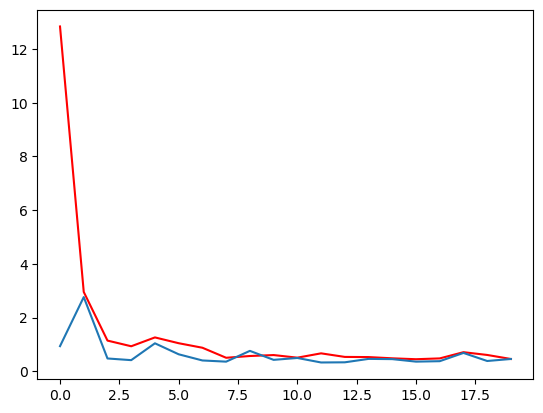

In [99]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'])

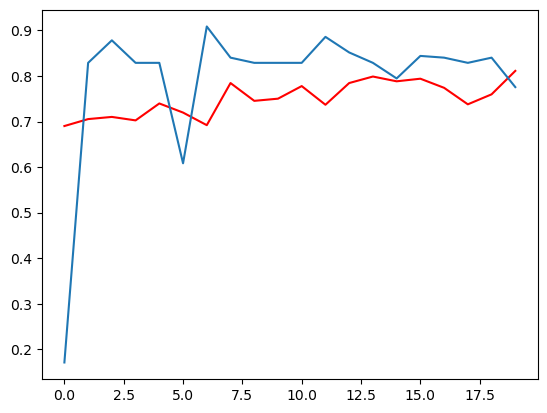

In [100]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'])

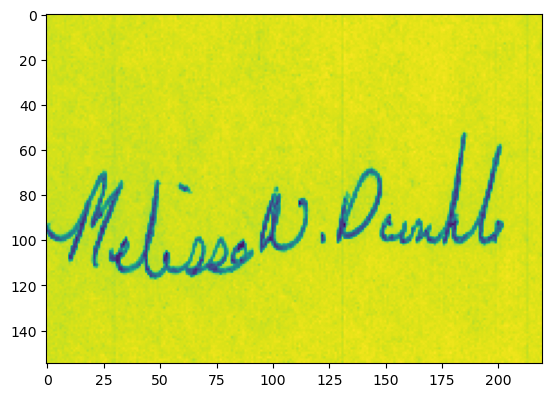

In [101]:
plt.imshow(x_test[1])

In [102]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [103]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [104]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
model.predict(x_train).argmax(axis=1)

41/41 [==============================] - 1s 30ms/step


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
confusion_matrixs = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrixs)

[[206  61]
 [ 16  45]]


In [107]:
cm_df = pd.DataFrame(confusion_matrixs,
                     index = [str(i) for i in range(2)],
                     columns = [str(i) for i in range(2)])

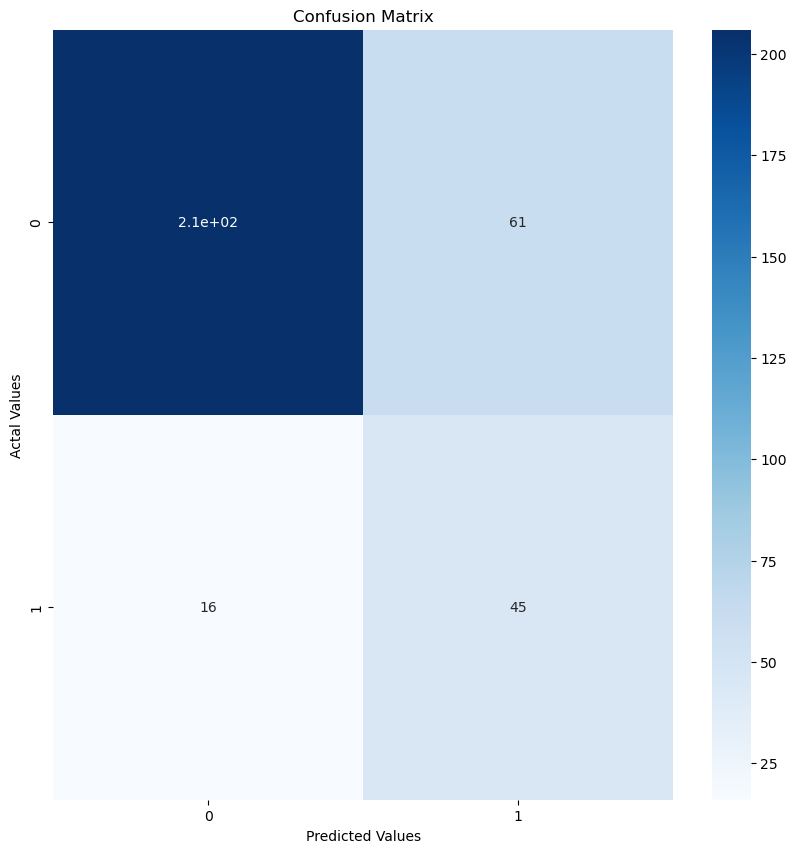

In [108]:
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [109]:
prf=precision_recall_fscore_support(y_test, y_pred, average='macro')

In [110]:
print(f'Precision= {prf[0]}\nRecall= {prf[1]}\nf1_score= {prf[2]}')

Precision= 0.6762281149073601
Recall= 0.7546202492785657
f1_score= 0.690728971504843
